In [10]:
import numpy as np
import psutil
import sys

cpu_us = []
mem_us = {}

def add_cpu_point():
  cpu_us.append(psutil.cpu_percent())

def add_data_point(x, x_name):
  cpu_us.append(psutil.cpu_percent())
  print(cpu_us)
  mem_us[x_name] = sys.getsizeof(x)
  print(mem_us)

creation of A

In [11]:
add_cpu_point()
a = np.random.rand(10000, 1000)
add_data_point(a, 'a')

[16.4, 46.4]
{'a': 80000120}


creation of B

In [12]:
add_cpu_point()
b = np.random.rand(1000, 10000)
add_data_point(b, 'b')

[16.4, 46.4, 27.6, 30.4]
{'a': 80000120, 'b': 80000120}


creation of C

In [13]:
add_cpu_point()
c = np.random.rand(10000)
add_data_point(c, 'c')

[16.4, 46.4, 27.6, 30.4, 29.4, 50.0]
{'a': 80000120, 'b': 80000120, 'c': 80104}


creation of AB

In [14]:
add_cpu_point()
ab = np.matmul(a, b) 
add_data_point(ab, 'ab')

[16.4, 46.4, 27.6, 30.4, 29.4, 50.0, 32.4, 67.3]
{'a': 80000120, 'b': 80000120, 'c': 80104, 'ab': 800000120}


creation of D

In [15]:
add_cpu_point()
d = np.matmul(ab, c)
add_data_point(d, 'd')

[16.4, 46.4, 27.6, 30.4, 29.4, 50.0, 32.4, 67.3, 66.7, 94.8]
{'a': 80000120, 'b': 80000120, 'c': 80104, 'ab': 800000120, 'd': 80104}


CDF plot

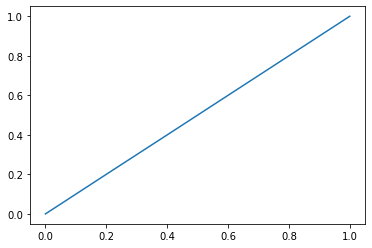

In [16]:
import scipy
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

x = a.flatten()

ecdf = ECDF(x)
plt.plot(ecdf.x, ecdf.y)

plt.show()

CPU usage plot

before a init: 16.4
after a init: 46.4
before b init: 27.6
after b init: 30.4
before c init: 29.4
after c init: 50.0
before ab init: 32.4
after ab init: 67.3
before d init: 66.7
after d init: 94.8


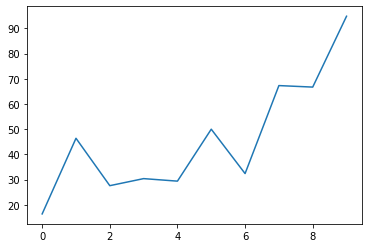

In [17]:
print('before a init:', cpu_us[0])
print('after a init:', cpu_us[1])

print('before b init:', cpu_us[2])
print('after b init:', cpu_us[3])

print('before c init:', cpu_us[4])
print('after c init:', cpu_us[5])

print('before ab init:', cpu_us[6])
print('after ab init:', cpu_us[7])

print('before d init:', cpu_us[8])
print('after d init:', cpu_us[9])

plt.plot(cpu_us)
plt.show()

Memory usage plot

{'a': 80000120, 'b': 80000120, 'c': 80104, 'ab': 800000120, 'd': 80104}


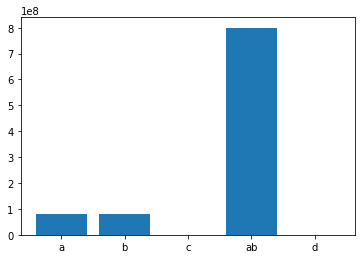

In [18]:
print(mem_us)
plt.bar(mem_us.keys(), mem_us.values())
plt.show()